### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [2]:
initial_data = pd.read_csv('taxi_dataset_lesson7.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [39]:
initial_data.shape[0] == processed_data.shape[0]

True

In [3]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [4]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [7]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

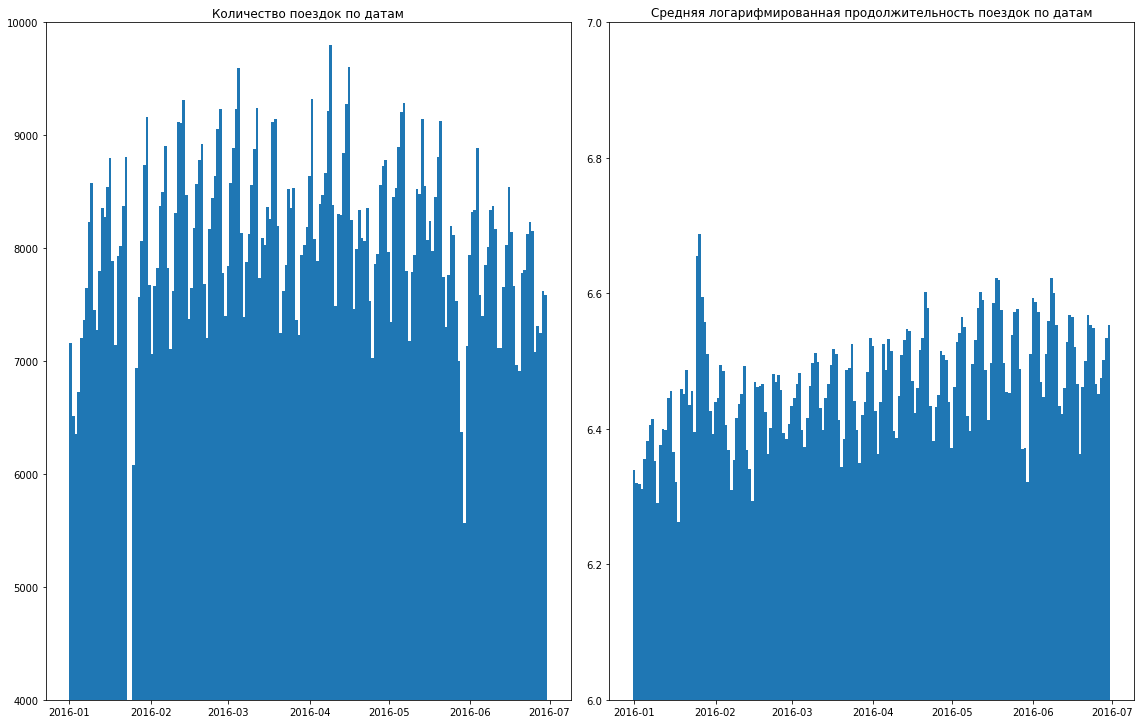

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


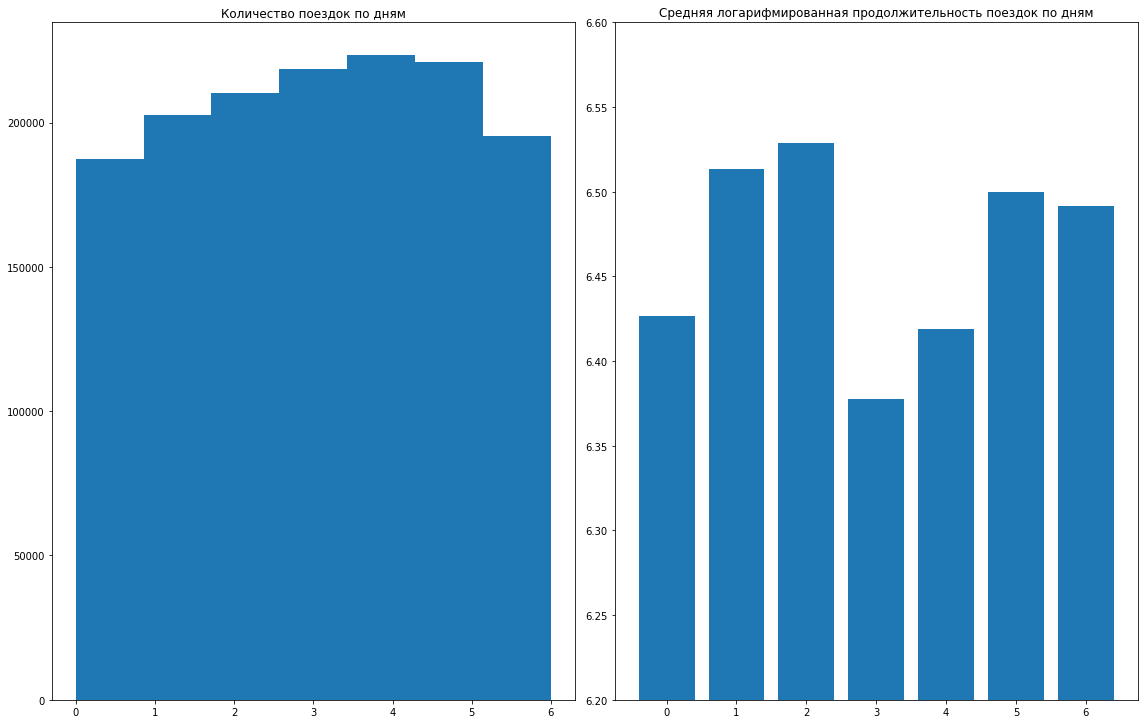

In [38]:
### Your code is here
### Количество поездок/Средняя продолжительность поездки vs День недели

from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.day_of_week.unique().shape[0])


ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(list(processed_data['day_of_week'].unique()), 
       processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'])
plt.ylim((6.2, 6.6))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням')

plt.show()

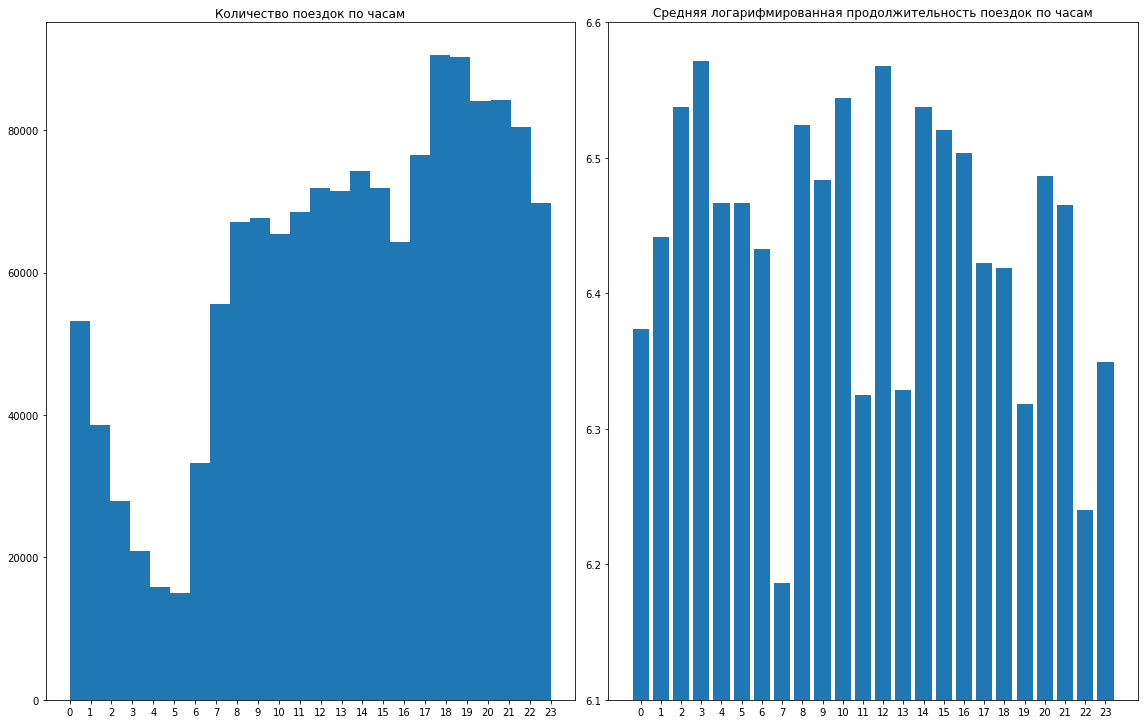

In [43]:
### Your code is here
### Количество поездок/Средняя продолжительность поездки vs Время суток

from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins=processed_data.hour.unique().shape[0])
ax_1.set_xticks(np.arange(0, 24))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(list(processed_data['hour'].unique()), 
       processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration'])
plt.ylim((6.1, 6.6))
ax_2.set_xticks(np.arange(0, 24))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по часам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по часам')

plt.show()

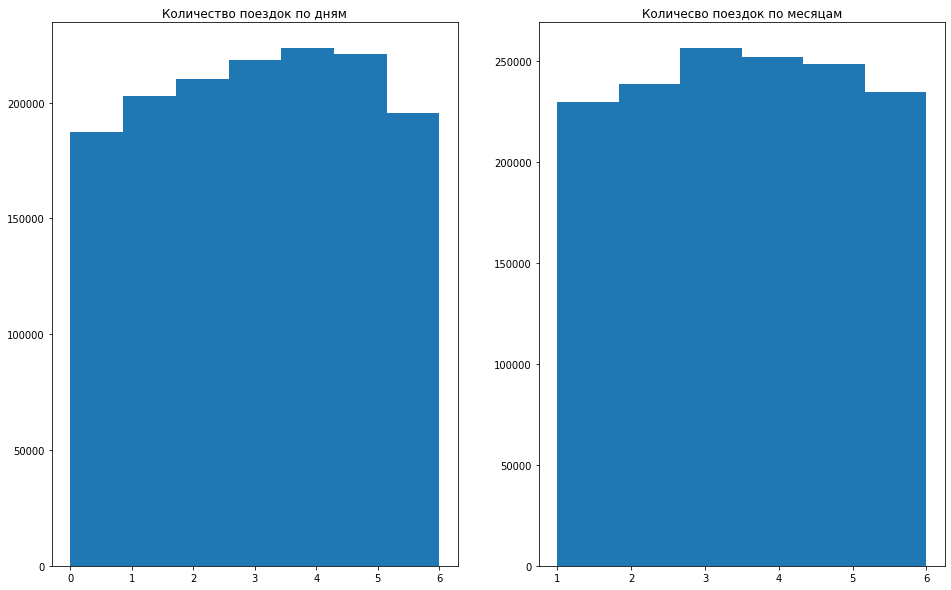

In [46]:
### Your code is here
### Распределение количества поездок по дням недели и месяцам

from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.day_of_week.unique().shape[0])


ax_2 = fig.add_subplot(1, 2, 2)
plt.hist(processed_data['month'], bins=processed_data.month.unique().shape[0])




ax_1.set(title = 'Количество поездок по дням')
ax_2.set(title = 'Количесво поездок по месяцам')

plt.show()

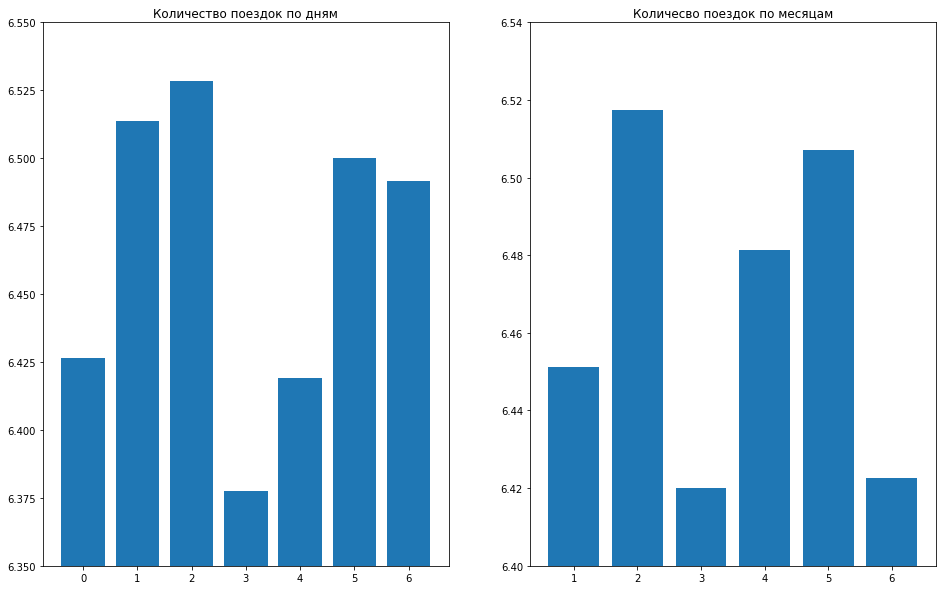

In [59]:
### Your code is here
### Распределение времени поездки по дням недели и месяцам

from matplotlib import pyplot as plt

c

ax_1 = fig.add_subplot(1, 2, 1)
plt.bar(list(processed_data['day_of_week'].unique()), 
       processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'])
plt.ylim((6.35, 6.55))




ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(list(processed_data['month'].unique()), 
       processed_data.groupby('month', as_index=False)['log_trip_duration'].mean()['log_trip_duration'])
plt.ylim((6.4, 6.54))





ax_1.set(title = 'Количество поездок по дням')
ax_2.set(title = 'Количесво поездок по месяцам')

plt.show()

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [9]:
processed_data[processed_data['month'] == 1].groupby(processed_data['date']).count()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
date,,,,,,,,,,
2016-01-01,7162,7162,7162,7162,7162,7162,7162,7162,7162,7162
2016-01-02,6512,6512,6512,6512,6512,6512,6512,6512,6512,6512
2016-01-03,6353,6353,6353,6353,6353,6353,6353,6353,6353,6353
2016-01-04,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725
2016-01-05,7204,7204,7204,7204,7204,7204,7204,7204,7204,7204
2016-01-06,7365,7365,7365,7365,7365,7365,7365,7365,7365,7365
2016-01-07,7649,7649,7649,7649,7649,7649,7649,7649,7649,7649
2016-01-08,8229,8229,8229,8229,8229,8229,8229,8229,8229,8229
2016-01-09,8578,8578,8578,8578,8578,8578,8578,8578,8578,8578


In [5]:
### Создадим первый бинарный признак
### Your code is here

from datetime import date
processed_data['anomaly'] = 0
processed_data.loc[processed_data['date'] == date(2016, 1, 23), 'anomaly'] = 1

In [19]:
processed_data[processed_data['date'] == date(2016, 1, 23)]

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id1027675,1,930.399753,0,1.001201,7.088409,2016-01-23 08:46:42,2016-01-23,5,8,1,1
id2657420,0,930.399753,0,7.044418,7.163172,2016-01-23 00:06:25,2016-01-23,5,0,1,1
id3382236,1,1070.232174,0,1.268585,5.808142,2016-01-23 10:38:43,2016-01-23,5,10,1,1
id2636301,1,930.399753,0,3.689727,6.885510,2016-01-23 01:16:58,2016-01-23,5,1,1,1
id0252677,1,1070.232174,0,3.358010,6.889591,2016-01-23 00:19:01,2016-01-23,5,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
id2645547,1,930.399753,0,1.001283,5.552960,2016-01-23 11:36:46,2016-01-23,5,11,1,1
id1907515,1,1028.236276,0,0.000000,6.133398,2016-01-23 01:08:39,2016-01-23,5,1,1,1
id1950275,0,1005.458335,0,4.712631,6.927558,2016-01-23 03:14:57,2016-01-23,5,3,1,1


In [95]:
processed_data.groupby(['day_of_week', 'hour', 'traffic_jam']).agg({'log_trip_duration': 'mean'}).sort_values(by=['log_trip_duration'], ascending=False).head(10)

log_trip_duration
day_of_week hour traffic_jam                   
3           14   1                     6.669526
            15   1                     6.650622
2           15   1                     6.647091
            11   1                     6.644226
            13   1                     6.640205
            14   1                     6.638930
1           11   1                     6.635141
3           11   1                     6.635055
4           15   1                     6.632537
3           16   1                     6.630965

In [33]:
processed_data[(processed_data['day_of_week'] == 2) & (processed_data['hour'].isin([11, 13, 14, 15]))]

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id1410897,0,930.399753,0,9.951986,7.754482,2016-03-23 14:10:39,2016-03-23,2,14,3,0,1
id2569332,0,930.399753,0,1.154389,5.902633,2016-04-13 14:24:47,2016-04-13,2,14,4,0,1
id3194108,0,930.399753,0,2.785471,7.510431,2016-06-01 11:48:41,2016-06-01,2,11,6,0,1
id2135557,1,1070.232174,0,2.237827,6.163315,2016-05-25 13:19:56,2016-05-25,2,13,5,0,1
id0038484,1,1005.458335,0,0.730220,6.602588,2016-03-09 13:41:11,2016-03-09,2,13,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
id1325943,0,930.399753,0,6.913516,8.010360,2016-05-25 15:08:13,2016-05-25,2,15,5,0,1
id1943039,0,930.399753,0,0.554843,5.488938,2016-06-29 14:55:48,2016-06-29,2,14,6,0,1
id0185501,0,930.399753,0,2.518577,6.018593,2016-04-27 14:39:30,2016-04-27,2,14,4,0,1


In [6]:
### Создадим второй бинарный признак
### Your code is here
processed_data['traffic_jam'] = 0
processed_data.loc[(processed_data['day_of_week'] == 2) & (processed_data['hour'].isin([11, 13, 14, 15])), 'traffic_jam'] = 1
processed_data.loc[(processed_data['day_of_week'] == 1) & (processed_data['hour'] == 11), 'traffic_jam'] = 1
processed_data.loc[(processed_data['day_of_week'] == 3) & (processed_data['hour'].isin([11, 14, 15, 16])), 'traffic_jam'] = 1
processed_data.loc[(processed_data['day_of_week'] == 4) & (processed_data['hour'] == 15), 'traffic_jam'] = 1

In [55]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [7]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [8]:
### Делаем OneHotEncoding и конкатим с processed_data


# for col in ['day_of_week', 'hour', 'month']:
    
    ### Your code is here
    
processed_data = pd.concat((processed_data, pd.get_dummies(processed_data['day_of_week'])), axis=1)
processed_data = processed_data.drop('day_of_week', axis=1)
    
for i in range(7):
    processed_data = processed_data.rename(columns={i: f'day_of_week_{i}'})

In [9]:
processed_data = pd.concat((processed_data, pd.get_dummies(processed_data['hour'])), axis=1)
processed_data = processed_data.drop('hour', axis=1)
    
for i in range(24):
    processed_data = processed_data.rename(columns={i: f'hour_{i}'})

In [10]:
processed_data = pd.concat((processed_data, pd.get_dummies(processed_data['month'])), axis=1)
processed_data = processed_data.drop('month', axis=1)
    
for i in range(1, 13):
    processed_data = processed_data.rename(columns={i: f'month_{i}'})

In [11]:
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_20,hour_21,hour_22,hour_23,month_1,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
processed_data = processed_data.drop(['day_of_week_0', 'hour_0', 'month_1'], axis=1)

In [71]:
processed_data.head(5)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,month_1,month_2,month_3,month_4,month_5
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id3858529,1,930.399753,0,6.392080,7.661527,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
processed_data.head(5).to_csv('step4.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [72]:
pd.concat((processed_data['distance_km'], processed_data['passenger_count']), axis=1).corr()

,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [2]:
### Your code is here



In [79]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,month_1,month_2,month_3,month_4,month_5
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id3858529,1,930.399753,0,6.392080,7.661527,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [102]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
X = processed_data.drop('log_trip_duration', axis=1)
Y = processed_data['log_trip_duration']

sfs.fit(X,Y)


SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [103]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [87]:
processed_data.shape

(1458644, 41)

In [104]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

model.fit(X[sfs.get_feature_names_out()], Y)

LinearRegression()

In [105]:
np.mean((Y - model.predict(X[sfs.get_feature_names_out()]))**2)

0.41540002340782545